<a href="https://colab.research.google.com/github/OlehVakulchyk/DataScience/blob/main/HW11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM

In [3]:
max_features = 10000
maxlen = 500
batch_size = 256
epochs = 7

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


# SimpleRNN

In [4]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(SimpleRNN(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_rnn = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 49s 589ms/step - loss: 0.6864 - acc: 0.5429 - val_loss: 0.6167 - val_acc: 0.7257
Epoch 2/7
69/69 [==============================] - 37s 540ms/step - loss: 0.5632 - acc: 0.7286 - val_loss: 0.6970 - val_acc: 0.6293
Epoch 3/7
69/69 [==============================] - 38s 550ms/step - loss: 0.4342 - acc: 0.8179 - val_loss: 0.3982 - val_acc: 0.8296
Epoch 4/7
69/69 [==============================] - 36s 520ms/step - loss: 0.3863 - acc: 0.8432 - val_loss: 0.3713 - val_acc: 0.8439
Epoch 5/7
69/69 [==============================] - 36s 524ms/step - loss: 0.3433 - acc: 0.8595 - val_loss: 0.4098 - val_acc: 0.8305
Epoch 6/7
69/69 [==============================] - 36s 530ms/step - loss: 0.3156 - acc: 0.8755 - val_loss: 0.3385 - val_acc: 0.8655
Epoch 7/7
69/69 [==============================] - 35s 513ms/step - loss: 0.2799 - acc: 0.8949 - val_loss: 0.3328 - val_acc: 0.8615

Total training time: 326.66 seconds


# LSTM



In [5]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_lstm = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 11s 102ms/step - loss: 0.6891 - acc: 0.5549 - val_loss: 0.6704 - val_acc: 0.6636
Epoch 2/7
69/69 [==============================] - 7s 104ms/step - loss: 0.5547 - acc: 0.7326 - val_loss: 0.4425 - val_acc: 0.8149
Epoch 3/7
69/69 [==============================] - 6s 84ms/step - loss: 0.4138 - acc: 0.8285 - val_loss: 0.4980 - val_acc: 0.7501
Epoch 4/7
69/69 [==============================] - 6s 85ms/step - loss: 0.3509 - acc: 0.8579 - val_loss: 0.3732 - val_acc: 0.8472
Epoch 5/7
69/69 [==============================] - 4s 58ms/step - loss: 0.3072 - acc: 0.8813 - val_loss: 0.3995 - val_acc: 0.8423
Epoch 6/7
69/69 [==============================] - 3s 49ms/step - loss: 0.2790 - acc: 0.8950 - val_loss: 0.2924 - val_acc: 0.8788
Epoch 7/7
69/69 [==============================] - 4s 62ms/step - loss: 0.2388 - acc: 0.9142 - val_loss: 0.4810 - val_acc: 0.7763

Total training time: 41.40 seconds


# Bidirectional LSTM

In [6]:
from keras.layers import Bidirectional

start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_bidirectional = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 12s 126ms/step - loss: 0.6920 - acc: 0.5223 - val_loss: 0.6886 - val_acc: 0.5929
Epoch 2/7
69/69 [==============================] - 6s 85ms/step - loss: 0.6269 - acc: 0.6736 - val_loss: 0.5323 - val_acc: 0.7901
Epoch 3/7
69/69 [==============================] - 6s 89ms/step - loss: 0.4818 - acc: 0.7970 - val_loss: 0.4000 - val_acc: 0.8343
Epoch 4/7
69/69 [==============================] - 5s 78ms/step - loss: 0.3868 - acc: 0.8460 - val_loss: 0.3701 - val_acc: 0.8528
Epoch 5/7
69/69 [==============================] - 5s 78ms/step - loss: 0.3268 - acc: 0.8746 - val_loss: 0.3411 - val_acc: 0.8617
Epoch 6/7
69/69 [==============================] - 5s 67ms/step - loss: 0.2983 - acc: 0.8867 - val_loss: 0.3014 - val_acc: 0.8752
Epoch 7/7
69/69 [==============================] - 4s 64ms/step - loss: 0.2715 - acc: 0.8980 - val_loss: 0.3288 - val_acc: 0.8617

Total training time: 85.18 seconds


# Deep RNN

In [7]:
start_time = time.time()

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_deep = model.fit(input_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.3)

elapsed_time = time.time() - start_time
print(f"\nTotal training time: {elapsed_time:.2f} seconds")

Epoch 1/7
69/69 [==============================] - 14s 133ms/step - loss: 0.6930 - acc: 0.5025 - val_loss: 0.6926 - val_acc: 0.4933
Epoch 2/7
69/69 [==============================] - 7s 98ms/step - loss: 0.6309 - acc: 0.6264 - val_loss: 0.5502 - val_acc: 0.7400
Epoch 3/7
69/69 [==============================] - 7s 105ms/step - loss: 0.4600 - acc: 0.7929 - val_loss: 0.4130 - val_acc: 0.8252
Epoch 4/7
69/69 [==============================] - 7s 106ms/step - loss: 0.3625 - acc: 0.8460 - val_loss: 0.3395 - val_acc: 0.8608
Epoch 5/7
69/69 [==============================] - 6s 89ms/step - loss: 0.3095 - acc: 0.8771 - val_loss: 0.4474 - val_acc: 0.7848
Epoch 6/7
69/69 [==============================] - 6s 89ms/step - loss: 0.2789 - acc: 0.8910 - val_loss: 0.3178 - val_acc: 0.8812
Epoch 7/7
69/69 [==============================] - 5s 79ms/step - loss: 0.2450 - acc: 0.9052 - val_loss: 0.3129 - val_acc: 0.8765

Total training time: 86.72 seconds


# Visualisation

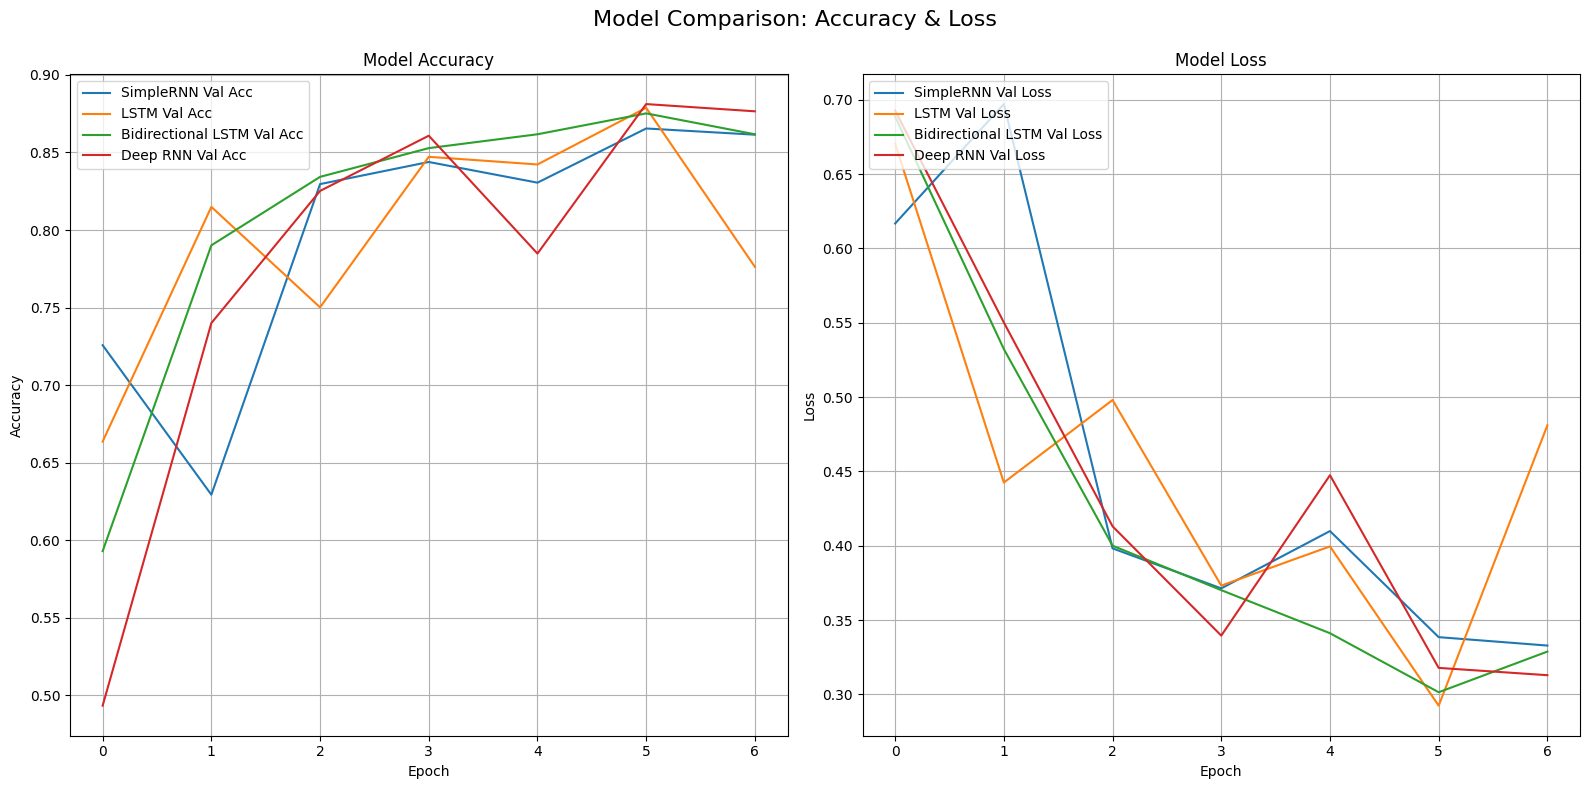

In [10]:
import matplotlib.pyplot as plt

def plot_history(histories, title):
    plt.figure(figsize=(16, 8))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    for name, history in histories:
        plt.plot(history.history['val_acc'], label=f'{name} Val Acc')

    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    # Loss subplot
    plt.subplot(1, 2, 2)
    for name, history in histories:
        plt.plot(history.history['val_loss'], label=f'{name} Val Loss')

    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.9)  # Adjust title position
    plt.show()

histories = [
    ['SimpleRNN', history_rnn],
    ['LSTM', history_lstm],
    ['Bidirectional LSTM', history_bidirectional],
    ['Deep RNN', history_deep]
]
plot_history(histories, 'Model Comparison: Accuracy & Loss')


In [11]:
# Список історій для порівняння

for name, history in histories:

    train_acc = history.history['acc'][-1]
    _, test_acc = history.model.evaluate(input_test, y_test, verbose=0)

    print(f"{name}:")
    print(f"Train accuracy: {train_acc:.4f} | Test accuracy: {test_acc:.4f} | Difference accuracy: {(train_acc - test_acc)*100:.2f}%")
    print("-"*75)

SimpleRNN:
Train accuracy: 0.8949 | Test accuracy: 0.8615 | Difference accuracy: 3.33%
---------------------------------------------------------------------------
LSTM:
Train accuracy: 0.9142 | Test accuracy: 0.7729 | Difference accuracy: 14.13%
---------------------------------------------------------------------------
Bidirectional LSTM:
Train accuracy: 0.8980 | Test accuracy: 0.8594 | Difference accuracy: 3.86%
---------------------------------------------------------------------------
Deep RNN:
Train accuracy: 0.9052 | Test accuracy: 0.8705 | Difference accuracy: 3.47%
---------------------------------------------------------------------------


Серед усіх моделей точність Bidirectional LSTM та SimpleRNN є приблизно однаковою 85,94% та 86,15%. Найбільший час навчання - 326,66 seconds має SimpleRNN. Найкраща модель Deep RNN, яка показала точність 87,05%. Що стосується моделі LSTM з найменшою точністю 77,29%, то, виходячи з її графіків, можна зауважити про недостатню кількість епох для навчання.